# Project: Wrangling and Analyze Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
%matplotlib inline
from bs4 import BeautifulSoup

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [55]:
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [56]:
request = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("image.tsv", "wb") as f:
    f.write(request.content)

In [57]:
img_pred = pd.read_csv("image.tsv", sep='\t')
img_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [58]:
request_2 = requests.get("https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt")
with open("tweet-json.json", "wb") as f:
    f.write(request_2.content)

In [59]:
tweet_json = pd.read_json("tweet-json.json", lines=True)
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [60]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [61]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [62]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [63]:
archive.duplicated().sum()

np.int64(0)

In [64]:
img_pred.duplicated().sum()

np.int64(0)

In [65]:
tweet_json_str = tweet_json.map(str)
tweet_json_str.duplicated().sum()

np.int64(0)

In [66]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [67]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [69]:
archive["rating_denominator"].value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [70]:
archive.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,NaN,NaN,NaN,NaN


In [71]:
print(archive.name.value_counts().nlargest(10000))

name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Kevon          1
Winifred       1
Hanz           1
Darla          1
Christoper     1
Name: count, Length: 956, dtype: int64


In [72]:
archive.expanded_urls.nunique()

2218

### Quality issues
1. Incorrect dog names: The name column in twitter-archive-enhanced.csv has clearly incorrect names like "a", "an", or "such".

2. Retweets included: Retweets are included despite not being original content (e.g., rows with non-null retweeted_status_id).

3. Duplicated columns in sources: Both source columns in twitter-archive-enhanced.csv and tweet-json.json are HTML tags, not cleaned for clarity.

4. Missing expanded_urls: Several rows have null expanded_urls, reducing data utility.

5. Incorrect data type: timestamp in archive needs to be datetime.

6. Invalid denominator values: there can be a lot of denominator values but there are ones that are really high and there is a denominator with the value of 0 and i notice that the way those numbers are extracted may not be the real rating value and just a number written in the tweet.

7. in_reply_to_status_id, in_reply_to_user_id have a lot of NAN values.

8. We only need dog ratings so p1_dog has to be TRUE.

### Tidiness issues
1. Dog stage columns split: doggo, floofer, pupper, and puppo are split into separate columns instead of a single dog_stage column.

2. Rating split: it would be better if we combine the numenator and the denominator in one rating column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [73]:
df_archive = archive.copy()
df_img_pred = img_pred.copy()
df_tweet_json = tweet_json.copy()

### Issue #1: Incorrect dog names: The name column in archive has clearly incorrect names like "a", "an", or "such".

#### Define: ['None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'] <-- this set has all the invalid names in the names column I will drop the rows having those words in the name column.

#### Code

In [74]:
# Define the list of invalid names
invalid_names = [
    'None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very',
    'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all',
    'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space'
]
df_archive.drop(df_archive[df_archive['name'].isin(invalid_names)].index, inplace=True)

#### Test

In [75]:
df_archive["name"].isin(invalid_names).sum()

np.int64(0)

### Issue #2: Retweets included: Retweets are included despite not being original content (e.g., rows with non-null retweeted_status_id).

#### Define: we will drop rows that is not null in the archive table and drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Code

In [76]:
df_archive.drop(df_archive[df_archive['retweeted_status_id'].notnull()].index, inplace=True)

#### Test

In [77]:
df_archive["retweeted_status_id"].notnull().sum()
df_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

### Issue #3: Duplicated columns in sources: Both source columns in twitter-archive-enhanced.csv and tweet-json.json are HTML tags, not cleaned for clarity.

#### Define: I will use beautiful soup to get the source url only.

#### Code

In [78]:
df_archive['source_link'] = df_archive['source'].apply(lambda x: BeautifulSoup(x, 'html.parser').a['href'] if pd.notnull(x) and BeautifulSoup(x, 'html.parser').a else None)
df_archive.drop(columns=['source'], inplace=True)

In [79]:
df_tweet_json['source_link'] = df_tweet_json['source'].apply(lambda x: BeautifulSoup(x, 'html.parser').a['href'] if pd.notnull(x) and BeautifulSoup(x, 'html.parser').a else None)
df_tweet_json.drop(columns=['source'], inplace=True)

#### Test

In [80]:
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_link
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone


In [81]:
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,source_link
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",NaN,NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone


### Issue #4: Missing expanded_urls: Several rows have null expanded_urls, reducing data utility.

#### Define: I will drop the rows that doesn't have any values in this column.

#### Code

In [82]:
df_archive.drop(df_archive[df_archive["expanded_urls"].isnull()].index, inplace=True)

#### Test

In [83]:
df_archive["expanded_urls"].isnull().sum()

np.int64(0)

### Issue #5: Incorrect data type: timestamp in archive needs to be datetime.

#### Define: I will just convert the timestamp column datatype to datetime using pandas.

#### Code

In [84]:
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

#### Test

In [85]:
df_archive["timestamp"].dtype

datetime64[ns, UTC]

### Issue #6: Invalid denominator values: there can be a lot of denominator values but there are ones that are really high and there is a denominator with the value of 0 and i notice that the way those numbers are extracted may not be the real rating value and just a number written in the tweet.

#### Define: I will drop the rows that has any denominator else 10 since they are 23 only.

#### Code

In [86]:
df_archive = df_archive[df_archive['rating_denominator'] == 10]

#### Test

In [87]:
(df_archive['rating_denominator'] == 10).all()

np.True_

### Issue #7: in_reply_to_status_id, in_reply_to_user_id have a lot of NAN values.

#### Define: I will drop both columns.

#### Code

In [88]:
df_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)


#### Test

In [89]:
df_archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_link
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone


### Issue #8: We only need dog ratings so p1_dog has to be TRUE.

#### Define: Since the changes in one dataframe will affect when we merge the dataframes so I merged all the dataframes and dropped after that so that the not dog tweets in the df_archive will also be removed.

#### Code

In [90]:
merged_df = df_archive.merge(df_img_pred, on='tweet_id', how='left')
merged_df = merged_df.merge(df_tweet_json[['id', 'retweet_count', 'favorite_count']], left_on='tweet_id', right_on='id', how='left')
merged_df.drop(columns=['id'], inplace=True)
master_df = merged_df[merged_df['p1_dog'] == True]

#### Test

In [91]:
master_df.sample(15)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1756,670995969505435648,2015-11-29 16:01:20+00:00,Yea I can't handle this job anymore your dogs ...,https://twitter.com/dog_rates/status/670995969...,12,10,NaN,NaN,NaN,NaN,...,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True,317,1175
1351,684538444857667585,2016-01-06 00:54:18+00:00,"After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,12,10,NaN,NaN,NaN,NaN,...,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False,1085,2915
268,831911600680497154,2017-02-15 17:02:36+00:00,Meet Kuyu. He was trapped in a well for 10 day...,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu,NaN,NaN,NaN,...,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True,7458,30380
1927,667534815156183040,2015-11-20 02:47:56+00:00,"This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,NaN,NaN,NaN,...,0.435254,True,Cardigan,0.307407,True,cocker_spaniel,0.033158,True,576,866
784,747219827526344708,2016-06-27 00:07:44+00:00,This is Atticus. He's remaining calm but his c...,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,NaN,NaN,NaN,...,0.548018,True,marmot,0.165503,False,collie,0.043003,True,1791,5792
105,868622495443632128,2017-05-28 00:18:35+00:00,Here's a h*ckin peaceful boy. Unbothered by th...,https://twitter.com/dog_rates/status/868622495...,13,10,NaN,NaN,NaN,NaN,...,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True,6275,28295
1700,672245253877968896,2015-12-03 02:45:32+00:00,Meet Snickers. He's adorable. Also comes in t-...,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,NaN,NaN,NaN,...,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True,169,733
310,825026590719483904,2017-01-27 17:04:02+00:00,Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,NaN,NaN,NaN,...,0.524454,True,Siberian_husky,0.467678,True,malamute,0.004976,True,1483,7020
291,828372645993398273,2017-02-05 22:40:03+00:00,This is Alexander Hamilpup. He was one of the ...,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,NaN,NaN,NaN,...,0.663047,True,Eskimo_dog,0.207779,True,Tibetan_mastiff,0.040949,True,3344,13756
1290,688064179421470721,2016-01-15 18:24:18+00:00,This is Kilo. He's a Pouncing Brioche. Really ...,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,NaN,NaN,NaN,...,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True,408,1878


### Issue #9: Dog stage columns split: doggo, floofer, pupper, and puppo are split into separate columns instead of a single dog_stage column.

#### Define: I will combine the three columns in one column.

#### Code

In [92]:
# Define stage columns
stage_columns = ['doggo', 'floofer', 'pupper', 'puppo']

master_df = master_df.copy()


# Combine non-empty stage values per row
def combine_stages(row):
    stages = [stage for stage in stage_columns if pd.notna(row[stage]) and row[stage] != '']
    return ','.join(stages) if stages else None

# Apply the function to create 'stage' column
master_df['stage'] = master_df.apply(combine_stages, axis=1)

# Drop the original stage columns
master_df.drop(columns=stage_columns, inplace=True)



#### Test

In [93]:
master_df.sample(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_link,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
1073,705898680587526145,2016-03-04 23:32:15+00:00,Meet Max. He's a Fallopian Cephalopuff. Eyes a...,https://twitter.com/dog_rates/status/705898680...,10,10,Max,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1.0,...,True,Border_collie,0.059437,True,groenendael,0.026720,True,643,2597,None
1731,671518598289059840,2015-12-01 02:38:04+00:00,This is Scruffers. He's being violated on mult...,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,1.0,...,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True,319,1010,None
232,837471256429613056,2017-03-03 01:14:41+00:00,This is Vincent. He's suave as h*ck. Will be y...,https://twitter.com/dog_rates/status/837471256...,12,10,Vincent,http://twitter.com/download/iphone,https://pbs.twimg.com/media/C59LpELWUAEUmYh.jpg,1.0,...,True,keeshond,0.013990,True,seat_belt,0.002111,False,2631,13967,None
663,761334018830917632,2016-08-04 22:52:29+00:00,This is Bruce. I really want to hear the joke ...,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,1.0,...,True,malinois,0.086152,True,German_shepherd,0.063333,True,1669,5792,None
411,808001312164028416,2016-12-11 17:31:39+00:00,This is Cooper. He likes to stick his tongue o...,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1.0,...,True,Staffordshire_bullterrier,0.130726,True,American_Staffordshire_terrier,0.028853,True,4098,14015,None


### Issue #10: Rating split: it would be better if we combine the numenator and the denominator in one rating column.

#### Define: I will combine them as a string so that I won't get a number and get a rating.

#### Code

In [94]:
master_df['rating'] = master_df['rating_numerator'].astype(str) + '/' + master_df['rating_denominator'].astype(str)
master_df.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)


#### Test

In [95]:
master_df.sample(5)

,tweet_id,timestamp,text,expanded_urls,name,source_link,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,rating
1802,670411370698022913,2015-11-28 01:18:21+00:00,Meet Scooter. He's ready for his first day of ...,https://twitter.com/dog_rates/status/670411370...,Scooter,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1.0,Maltese_dog,0.584397,...,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True,991,2176,None,12/10
264,832369877331693569,2017-02-16 23:23:38+00:00,This is Charlie. He fell asleep on a heating v...,https://twitter.com/dog_rates/status/832369877...,Charlie,http://twitter.com/download/iphone,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1.0,kelpie,0.504690,...,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True,3652,18792,None,11/10
43,882992080364220416,2017-07-06 15:58:11+00:00,This is Rusty. He wasn't ready for the first p...,https://twitter.com/dog_rates/status/882992080...,Rusty,http://twitter.com/download/iphone,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1.0,Eskimo_dog,0.466778,...,Siberian_husky,0.406044,True,dingo,0.073414,False,4122,24445,None,13/10
1076,705475953783398401,2016-03-03 19:32:29+00:00,Say hello to Zara. She found a sandal and coul...,https://twitter.com/dog_rates/status/705475953...,Zara,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1.0,golden_retriever,0.908784,...,Labrador_retriever,0.030361,True,tennis_ball,0.004996,False,1045,3231,None,12/10
1944,667200525029539841,2015-11-19 04:39:35+00:00,This is Joshwa. He is a fuckboy supreme. He cl...,https://twitter.com/dog_rates/status/667200525...,Joshwa,http://twitter.com/download/iphone,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1.0,Siberian_husky,0.694904,...,malamute,0.232006,True,Eskimo_dog,0.050635,True,282,658,None,11/10


### Issue #11: (After making a master dataset) I noticed that some names has NAN values.

Define: I will change the NAN values to "Not mentioned".

#### Code

In [96]:
master_df['name'].fillna("Not mentioned", inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_11656\2731244169.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_df['name'].fillna("Not mentioned", inplace=True)


#### Test

In [97]:
master_df['name'].isna().sum()

np.int64(0)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [98]:
master_df.to_csv("C:/Users/PC/Downloads/project/main/twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [99]:
master_df['stage'].value_counts()

stage
pupper           136
doggo             48
puppo             19
floofer            7
doggo,pupper       7
doggo,puppo        1
doggo,floofer      1
Name: count, dtype: int64

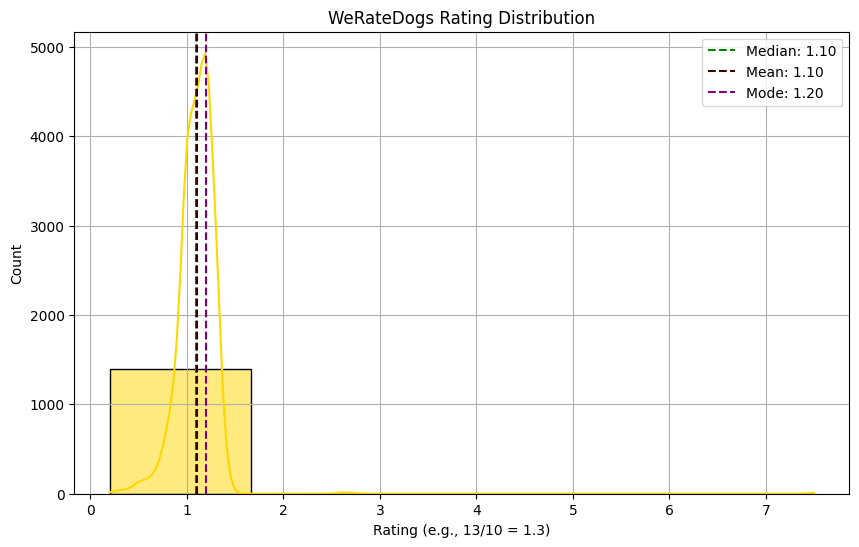

In [103]:
# Convert 'rating' column to float (e.g., "13/10" -> 1.3)
rating_float = master_df['rating'].str.split('/', expand=True)
rating_float = rating_float[0].astype(float) / rating_float[1].astype(float)

mean_rating = rating_float.mean()
median_rating = rating_float.median()
mode_rating = rating_float.mode()[0]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(rating_float, kde=True, bins=5, color='gold')

# Lines for mean, median, mode
plt.axvline(median_rating, color='green', linestyle='--', label=f'Median: {median_rating:.2f}')
plt.axvline(mean_rating, color='#360101', linestyle='--', label=f'Mean: {mean_rating:.2f}')
plt.axvline(mode_rating, color='purple', linestyle='--', label=f'Mode: {mode_rating:.2f}')

# Labels and title
plt.legend()
plt.title('WeRateDogs Rating Distribution')
plt.xlabel('Rating (e.g., 13/10 = 1.3)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

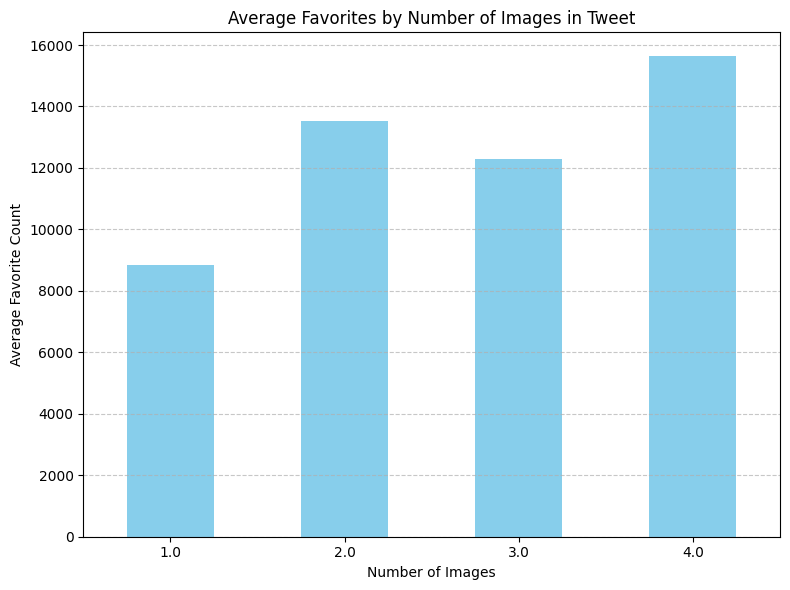

In [101]:
avg_fav_by_img = master_df.groupby('img_num')['favorite_count'].mean()

# Plot
plt.figure(figsize=(8, 6))
avg_fav_by_img.plot(kind='bar', color='skyblue')

plt.title('Average Favorites by Number of Images in Tweet')
plt.xlabel('Number of Images')
plt.ylabel('Average Favorite Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insights:
1. Puppers are the most used dog stage in the tweets.

2. Most of the rating are near 1.2

3. Images in each tweet doesn't affect the favorite counts.

### Visualization

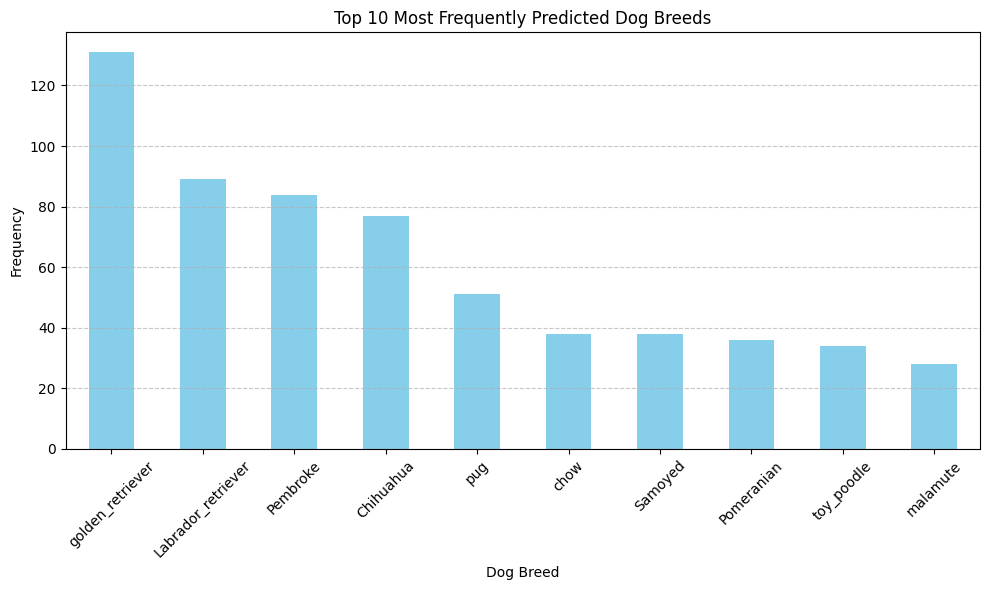

In [102]:
# Count top dog breeds in p1
top_breeds = master_df[master_df['p1_dog'] == True]['p1'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_breeds.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequently Predicted Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()